# Check UWD filled with ERA5

https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels

#### ERA5 hourly data on single levels from 1940 to present

- **Radiation and heat** / Surface net solar radiation
- **Radiation and heat** / Surface net solar thermal downwards
- **Radiation and heat** / Surface solar thermal downwards: `f88e980e24b1ba4fe8b42cb557ff66ae.nc`
- **Radiation and heat** / Surface solar radiation downwards: `8ef1b5ef403bac84d5778e9bf4b7e26f.nc`
- **Mean rates** / Mean surface downward long-wave radiation flux (test 2019): `23122b75afc3c080d1f85c7b5539b12f.nc`

Note: Mean rates = Radiation and heat/3600



------- 73.35 ------  
-80.05 ------- -79.8    
------- 73.1 ------  

(get 4 closest grid cells)

Downloaded by Mickaël Lalande 27/03/2025
  

In [1]:
# Env: sc2_v0
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xskillscore as xs
import calendar
import os

In [2]:
# Bylot TUNDRA station (Domine et al., 2021: https://essd.copernicus.org/articles/13/4331/2021/)
lat = 73.1504
lon = -80.0046

In [3]:
path = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/Bylot/ERA5'

## Surface long-wave (thermal) radiation upwards

In [4]:
ds_d = xr.open_mfdataset(path+'/LW_down/*.nc')
ds_d.load()

<xarray.Dataset> Size: 4MB
Dimensions:     (valid_time: 107111, latitude: 2, longitude: 2)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 857kB 2013-01-01 ... 2025-03-21T2...
  * latitude    (latitude) float64 16B 73.35 73.1
  * longitude   (longitude) float64 16B -80.05 -79.8
    expver      (valid_time) <U4 2MB '0001' '0001' '0001' ... '0005' '0005'
Data variables:
    strd        (valid_time, latitude, longitude) float32 2MB 4.96e+05 ... 6....
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-04T20:54 GRIB to CDM+CF via cfgrib-0.9.1...

In [4]:
ds_net = xr.open_mfdataset(path+'/LW_net/*.nc')
ds_net.load()

<xarray.Dataset> Size: 4MB
Dimensions:     (valid_time: 107111, latitude: 2, longitude: 2)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 857kB 2013-01-01 ... 2025-03-21T2...
  * latitude    (latitude) float64 16B 73.35 73.1
  * longitude   (longitude) float64 16B -80.05 -79.8
    expver      (valid_time) <U4 2MB '0001' '0001' '0001' ... '0005' '0005'
Data variables:
    strd        (valid_time, latitude, longitude) float32 2MB 4.96e+05 ... 6....
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-04T20:54 GRIB to CDM+CF via cfgrib-0.9.1...

LWnet = strd - stru

stru = strd - LWnet

In [4]:
ds_u = 
ds_u

<xarray.Dataset> Size: 4MB
Dimensions:     (valid_time: 107111, latitude: 2, longitude: 2)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 857kB 2013-01-01 ... 2025-03-21T2...
  * latitude    (latitude) float64 16B 73.35 73.1
  * longitude   (longitude) float64 16B -80.05 -79.8
    expver      (valid_time) <U4 2MB '0001' '0001' '0001' ... '0005' '0005'
Data variables:
    strd        (valid_time, latitude, longitude) float32 2MB 4.96e+05 ... 6....
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-04T20:54 GRIB to CDM+CF via cfgrib-0.9.1...

### Add Bylot TUNDRA coordinates

In [5]:
ds.latitude

<xarray.DataArray 'latitude' (latitude: 2)> Size: 16B
array([73.35, 73.1 ])
Coordinates:
    number    int64 8B 0
  * latitude  (latitude) float64 16B 73.35 73.1
Attributes:
    units:             degrees_north
    standard_name:     latitude
    long_name:         latitude
    stored_direction:  decreasing

In [6]:
# Ajouter les nouvelles coordonnées
new_lats = np.sort(np.append(ds.latitude.values, lat))
new_lons = np.sort(np.append(ds.longitude.values, lon))

In [7]:
new_lats

array([73.1   , 73.1504, 73.35  ])

In [8]:
new_lons

array([-80.05  , -80.0046, -79.8   ])

In [9]:
ds_interp = ds.interp(latitude=new_lats, longitude=new_lons)
ds_interp

<xarray.Dataset> Size: 10MB
Dimensions:     (valid_time: 107111, latitude: 3, longitude: 3)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 857kB 2013-01-01 ... 2025-03-21T2...
    expver      (valid_time) <U4 2MB '0001' '0001' '0001' ... '0005' '0005'
  * latitude    (latitude) float64 24B 73.1 73.15 73.35
  * longitude   (longitude) float64 24B -80.05 -80.0 -79.8
Data variables:
    strd        (valid_time, latitude, longitude) float64 8MB 5.207e+05 ... 5...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-04T20:54 GRIB to CDM+CF via cfgrib-0.9.1...

In [10]:
import warnings
warnings.filterwarnings('ignore')

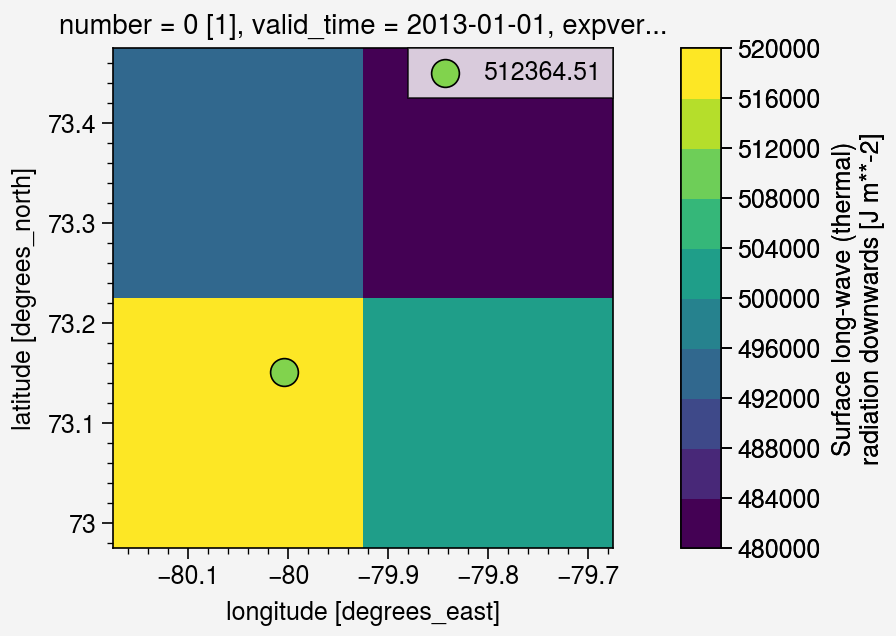

In [11]:
%matplotlib inline
fig, ax = pplt.subplots()

i_time = 0
pcolor = ds.strd[i_time].plot.pcolormesh(ax=ax)

# Récupérer les limites de la colorbar
vmin, vmax = pcolor.get_clim()

value = ds_interp.strd.sel(latitude=lat, longitude=lon)[i_time].item()  # Valeur scalaire

# Obtenir la couleur correspondante
import matplotlib.colors as mcolors  # Utilisation de matplotlib pour normaliser
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)  # Normalisation correcte
cmap = pcolor.get_cmap()
color = cmap(norm(value))  # Convertir la valeur en couleur

# Ajouter le point avec la bonne couleur
ax.scatter(lon, lat, color=color, edgecolors="black", s=100, label=f"{value:.2f}")

# Afficher la légende
ax.legend()
pplt.show()

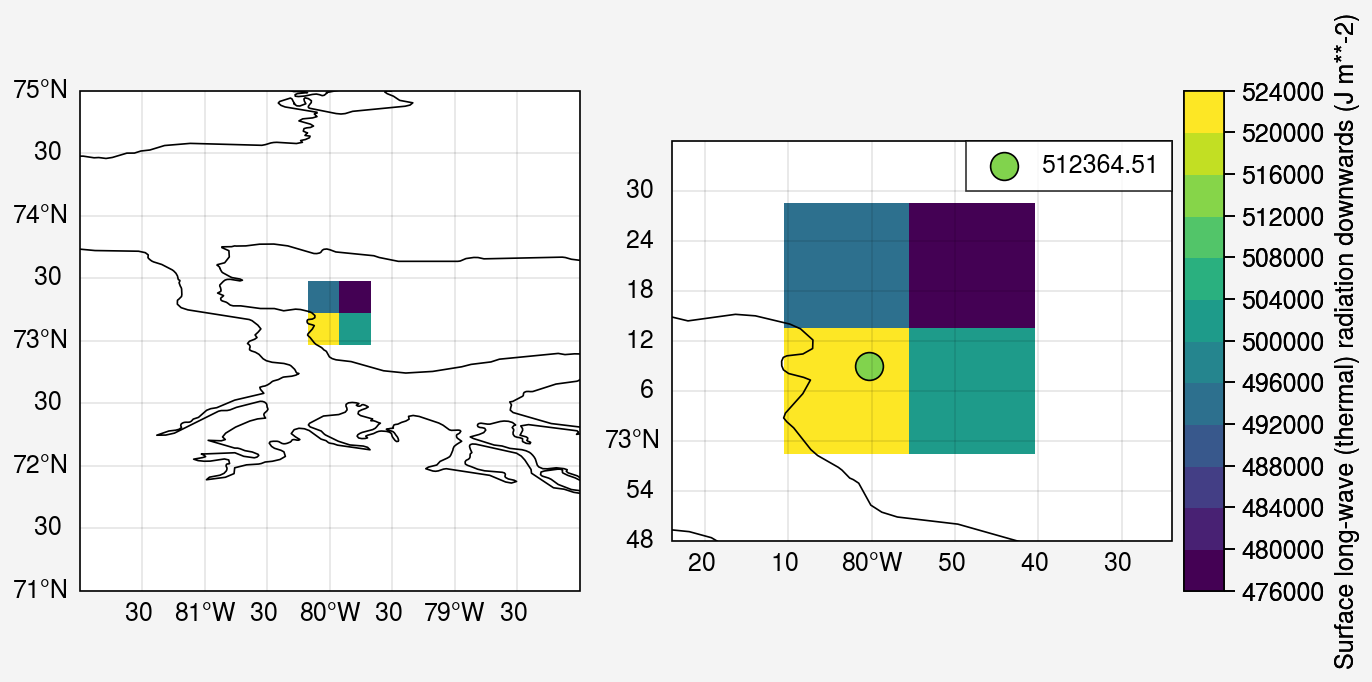

In [12]:
%matplotlib inline
fig, axs = pplt.subplots(proj='cyl', ncols=2)

i_time = 0
ax = axs[0]
ax.pcolormesh(ds.strd[i_time], cmap='viridis')

ax.format(
    borders=True, 
    coast=True, 
    labels=True, 
    latlim=(71, 75), 
    lonlim=(-82, -78),
    reso='hi'
)

ax = axs[1]
ax.pcolormesh(ds.strd[i_time], cmap='viridis', colorbar='r')

ax.format(
    borders=True, 
    coast=True, 
    labels=True, 
    latlim=(72.8, 73.6), 
    lonlim=(-79.4, -80.4),
    reso='hi'
)


# Récupérer les limites de la colorbar
vmin, vmax = pcolor.get_clim()

value = ds_interp.strd.sel(latitude=lat, longitude=lon)[i_time].item()  # Valeur scalaire

# Obtenir la couleur correspondante
import matplotlib.colors as mcolors  # Utilisation de matplotlib pour normaliser
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)  # Normalisation correcte
cmap = pcolor.get_cmap()
color = cmap(norm(value))  # Convertir la valeur en couleur

# Ajouter le point avec la bonne couleur
ax.scatter(lon, lat, color=color, edgecolors="black", s=100, label=f"{value:.2f}")
ax.legend()

#reso : {'lo', 'med', 'hi', 'x-hi', 'xx-hi'}, optional


In [13]:
ds_interp.latitude.values

array([73.1   , 73.1504, 73.35  ])

In [14]:
ds_interp.longitude.values

array([-80.05  , -80.0046, -79.8   ])

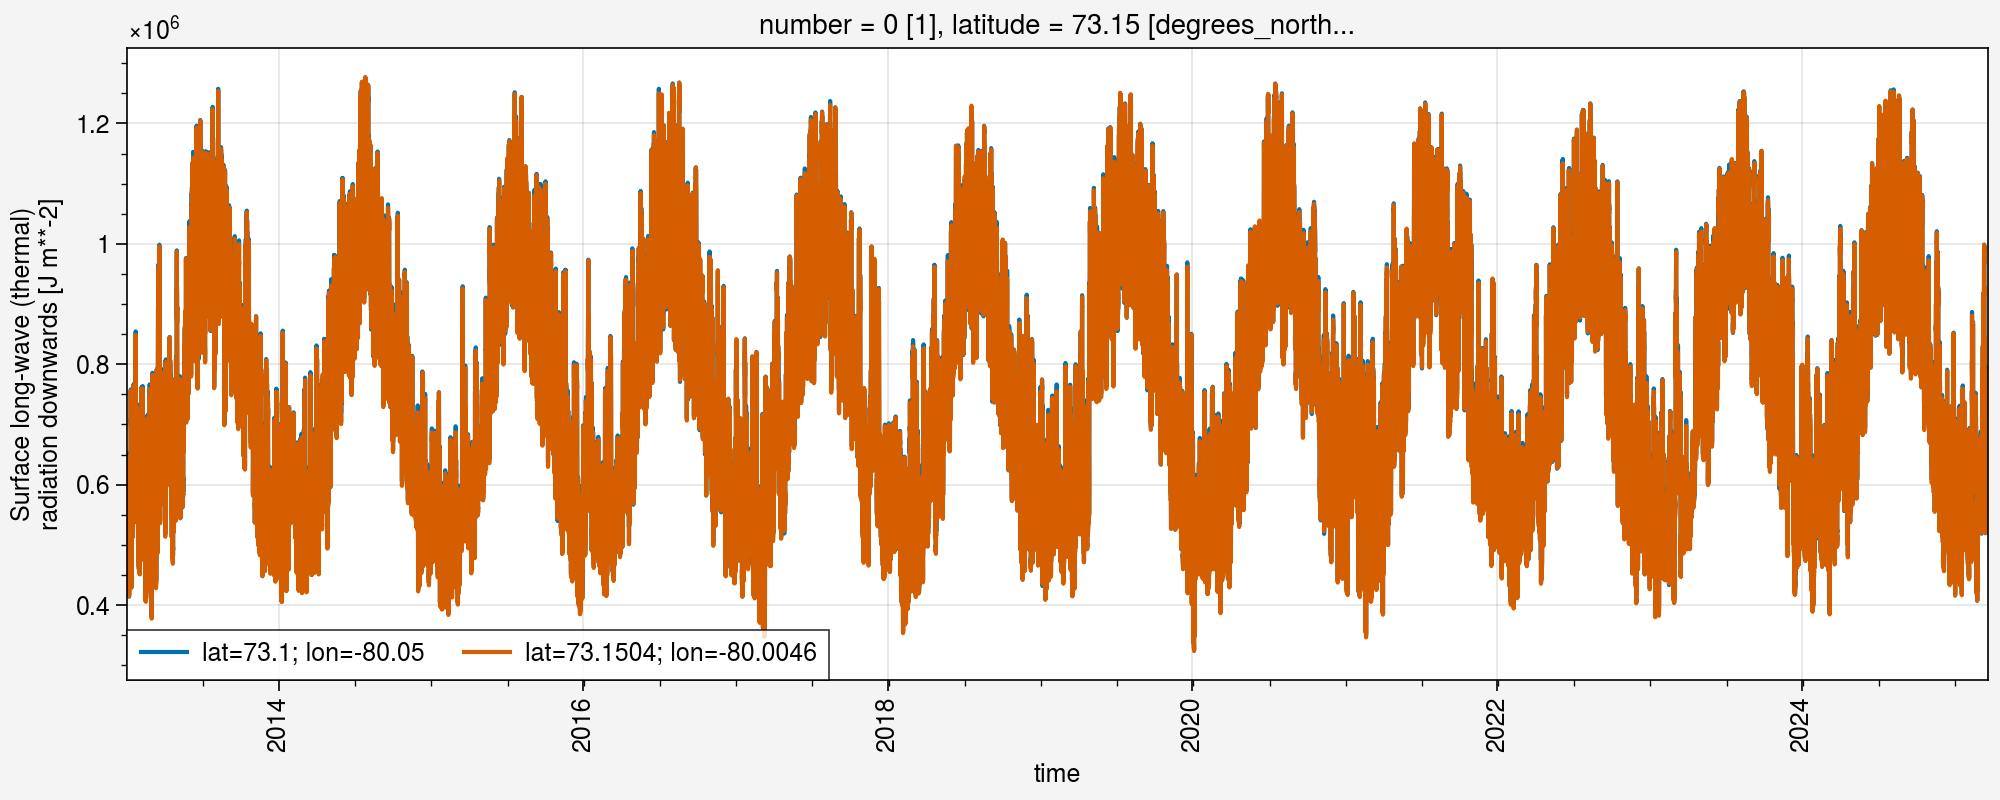

In [15]:
%matplotlib inline
fig, axs = pplt.subplots(figsize=(10,4))

ds_interp.strd.sel(latitude=73.1, longitude=-80.05).plot(ax=axs[0], label='lat=73.1; lon=-80.05')
ds_interp.strd.sel(latitude=73.1504, longitude=-80.0046).plot(ax=axs[0], label='lat=73.1504; lon=-80.0046')
axs.legend()

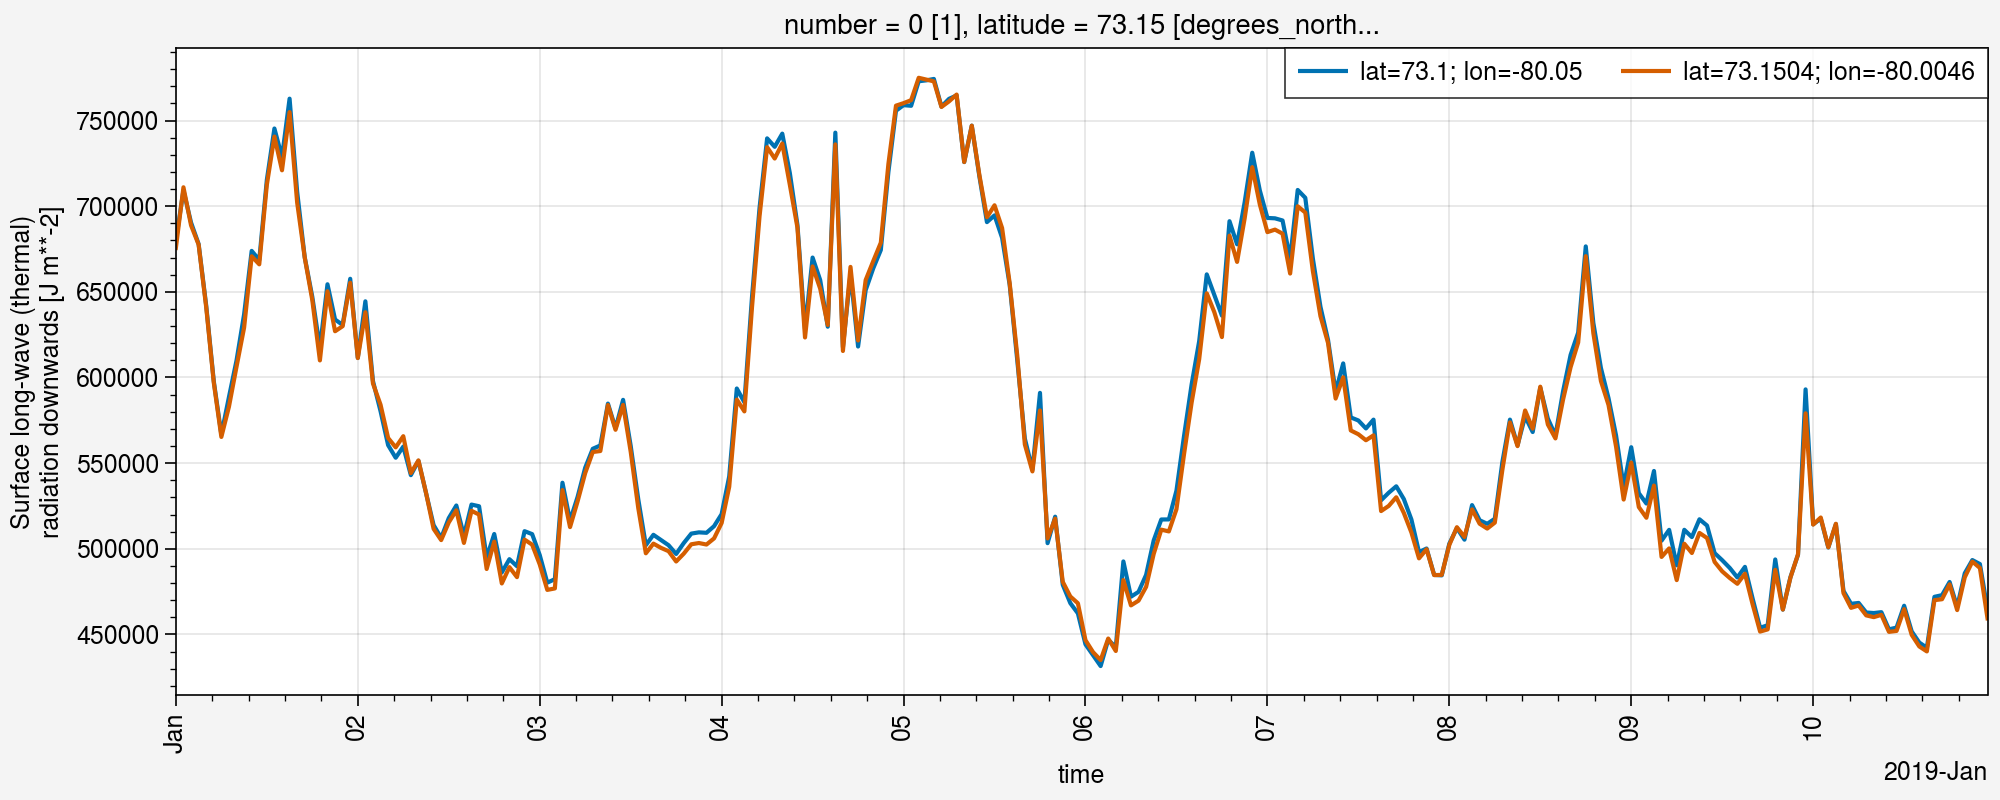

In [16]:
%matplotlib inline
fig, axs = pplt.subplots(figsize=(10,4))

ds_interp.strd.sel(latitude=73.1, longitude=-80.05, valid_time=slice('2019-01-01', '2019-01-10')).plot(ax=axs[0], label='lat=73.1; lon=-80.05')
ds_interp.strd.sel(latitude=73.1504, longitude=-80.0046, valid_time=slice('2019-01-01', '2019-01-10')).plot(ax=axs[0], label='lat=73.1504; lon=-80.0046')
axs.legend()

Need to divide by 3600 to get W m-2 s-1

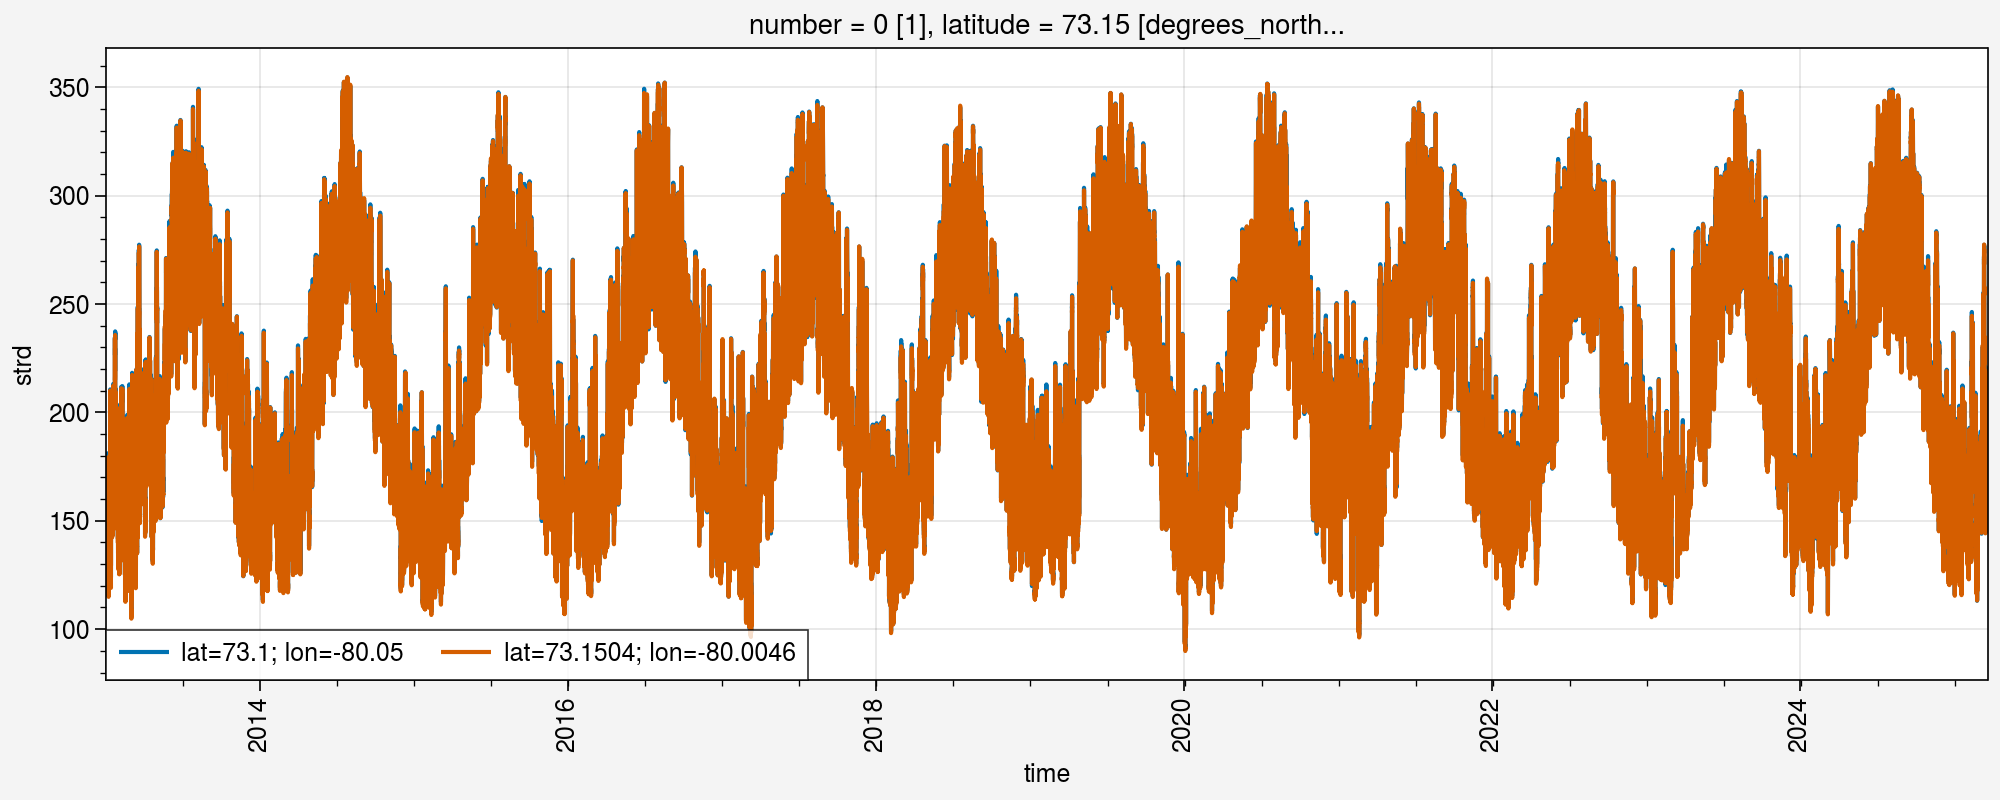

In [17]:
%matplotlib inline
fig, axs = pplt.subplots(figsize=(10,4))

(ds_interp.strd.sel(latitude=73.1, longitude=-80.05)/3600).plot(ax=axs[0], label='lat=73.1; lon=-80.05')
(ds_interp.strd.sel(latitude=73.1504, longitude=-80.0046)/3600).plot(ax=axs[0], label='lat=73.1504; lon=-80.0046')
axs.legend()

## Export data to .dat or .csv 
Only pixel including Bylot and interpolated values

In [18]:
ds_interp_out = ds_interp.strd.drop('number').drop('expver').rename({'valid_time': 'time', 'latitude': 'lat', 'longitude': 'lon'})
ds_interp_out = ds_interp_out/3600
ds_interp_out.attrs = {'long_name': 'Surface long-wave (thermal) radiation downwards', 'name': 'strd', 'units': 'W m$^{-2}$ s$^{-1}$'}

ds_interp_out_grid = ds_interp_out.sel(lat=73.1, lon=-80.05)
ds_interp_out_interp = ds_interp_out.sel(lat=73.1504, lon=-80.0046)
ds_interp_out_interp

<xarray.DataArray 'strd' (time: 107111)> Size: 857kB
array([142.32347477, 139.70922053, 145.73005542, ..., 167.99312636,
       171.65158063, 168.13511467])
Coordinates:
  * time     (time) datetime64[ns] 857kB 2013-01-01 ... 2025-03-21T22:00:00
    lat      float64 8B 73.15
    lon      float64 8B -80.0
Attributes:
    long_name:  Surface long-wave (thermal) radiation downwards
    name:       strd
    units:      W m$^{-2}$ s$^{-1}$

In [19]:
df_grid = ds_interp_out_grid.to_dataframe()
df_grid

,lat,lon,strd
time,,,
2013-01-01 00:00:00,73.1,-80.05,144.648698
2013-01-01 01:00:00,73.1,-80.05,141.447778
2013-01-01 02:00:00,73.1,-80.05,147.500556
2013-01-01 03:00:00,73.1,-80.05,138.821840
2013-01-01 04:00:00,73.1,-80.05,144.000347
...,...,...,...
2025-03-21 18:00:00,73.1,-80.05,186.736823
2025-03-21 19:00:00,73.1,-80.05,170.529288
2025-03-21 20:00:00,73.1,-80.05,168.189444


In [20]:
df_interp = ds_interp_out_interp.to_dataframe()
df_interp

,lat,lon,strd
time,,,
2013-01-01 00:00:00,73.1504,-80.0046,142.323475
2013-01-01 01:00:00,73.1504,-80.0046,139.709221
2013-01-01 02:00:00,73.1504,-80.0046,145.730055
2013-01-01 03:00:00,73.1504,-80.0046,137.481558
2013-01-01 04:00:00,73.1504,-80.0046,142.507157
...,...,...,...
2025-03-21 18:00:00,73.1504,-80.0046,187.003877
2025-03-21 19:00:00,73.1504,-80.0046,170.216323
2025-03-21 20:00:00,73.1504,-80.0046,167.993126


## Get data from Florent

In [2]:
path = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/Bylot/ERA5'

In [30]:
# df_lwd = pd.read_excel(path+'/LWdownwell-ML.xlsx', parse_dates=['time, UTC'])
df_lwd = pd.read_excel(path+'/LWdownwell-ML.xlsx')
# df.set_index('time, UTC', inplace=True)
df_lwd

,TIMESTAMP,ERA5.UTC-5,LWD si raw<-5,Air Temp. °C,Corr,LWD,Unnamed: 6,86.41243143347727
0,UTC-5,NaN,Values,NaN,bivariate,Gap filled,NaN,0.732325
1,NaN,NaN,eliminate zeros,NaN,NaN,bivariate,NaN,1.159072
2,2013-07-11 09:00:00,298.572292,NaN,6.819954,312.9691,312.9691,NaN,NaN
3,2013-07-11 10:00:00,295.664792,NaN,6.957644,310.99946,310.99946,NaN,NaN
4,2013-07-11 11:00:00,286.946858,NaN,8.925269,306.89572,306.89572,NaN,NaN
...,...,...,...,...,...,...,...,...
96694,2024-07-22 05:00:00,233.925260,NaN,5.713818,264.344394,264.344394,NaN,NaN
96695,2024-07-22 06:00:00,260.474549,NaN,5.239056,283.23681,283.23681,NaN,NaN
96696,2024-07-22 07:00:00,249.057431,NaN,5.645973,275.347419,275.347419,NaN,NaN
96697,2024-07-22 08:00:00,244.788281,NaN,5.442513,271.985191,271.985191,NaN,NaN


In [31]:
df_lwd = pd.read_excel(path+'/LWdownwell-ML.xlsx')
df_lwd = df_lwd.iloc[2:, :-2]
df_lwd.set_index('TIMESTAMP', inplace=True)
df_lwd

,ERA5.UTC-5,LWD si raw<-5,Air Temp. °C,Corr,LWD
TIMESTAMP,,,,,
2013-07-11 09:00:00,298.572292,NaN,6.819954,312.9691,312.9691
2013-07-11 10:00:00,295.664792,NaN,6.957644,310.99946,310.99946
2013-07-11 11:00:00,286.946858,NaN,8.925269,306.89572,306.89572
2013-07-11 12:00:00,274.560590,NaN,10.422386,299.560216,299.560216
2013-07-11 13:00:00,267.331007,NaN,8.218802,291.711702,291.711702
...,...,...,...,...,...
2024-07-22 05:00:00,233.925260,NaN,5.713818,264.344394,264.344394
2024-07-22 06:00:00,260.474549,NaN,5.239056,283.23681,283.23681
2024-07-22 07:00:00,249.057431,NaN,5.645973,275.347419,275.347419


In [32]:
df_lwd.index

DatetimeIndex(['2013-07-11 09:00:00', '2013-07-11 10:00:00',
               '2013-07-11 11:00:00', '2013-07-11 12:00:00',
               '2013-07-11 13:00:00', '2013-07-11 14:00:00',
               '2013-07-11 15:00:00', '2013-07-11 16:00:00',
               '2013-07-11 17:00:00', '2013-07-11 18:00:00',
               ...
               '2024-07-22 00:00:00', '2024-07-22 01:00:00',
               '2024-07-22 02:00:00', '2024-07-22 03:00:00',
               '2024-07-22 04:00:00', '2024-07-22 05:00:00',
               '2024-07-22 06:00:00', '2024-07-22 07:00:00',
               '2024-07-22 08:00:00', '2024-07-22 09:00:00'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=96697, freq=None)

In [96]:
ds_lwd = df_lwd.to_xarray()
ds_lwd = ds_lwd.rename({'TIMESTAMP': 'time'})
ds_lwd['LWD si raw<-5'] = ds_lwd['LWD si raw<-5'].astype('float64')
ds_lwd['LWD'] = ds_lwd['LWD'].astype('float64')
ds_lwd['Corr'] = ds_lwd['Corr'].astype('float64')
ds_lwd

<xarray.Dataset> Size: 5MB
Dimensions:        (time: 96697)
Coordinates:
  * time           (time) datetime64[ns] 774kB 2013-07-11T09:00:00 ... 2024-0...
Data variables:
    ERA5.UTC-5     (time) float64 774kB 298.6 295.7 286.9 ... 249.1 244.8 236.7
    LWD si raw<-5  (time) float64 774kB nan nan nan nan nan ... nan nan nan nan
    Air Temp. °C   (time) float64 774kB 6.82 6.958 8.925 ... 5.646 5.443 6.152
    Corr           (time) float64 774kB 313.0 311.0 306.9 ... 275.3 272.0 266.9
    LWD            (time) float64 774kB 313.0 311.0 306.9 ... 275.3 272.0 266.9

In [36]:
ds_interp_out_grid.plot()

<xarray.DataArray 'strd' (time: 107111)> Size: 857kB
array([144.64869792, 141.44777778, 147.50055556, ..., 168.18944444,
       171.64998264, 168.55048611])
Coordinates:
  * time     (time) datetime64[ns] 857kB 2013-01-01 ... 2025-03-21T22:00:00
    lat      float64 8B 73.1
    lon      float64 8B -80.05
Attributes:
    long_name:  Surface long-wave (thermal) radiation downwards
    name:       strd
    units:      W m$^{-2}$ s$^{-1}$

In [44]:
ds_lwd.time

<xarray.DataArray 'time' (time: 96697)> Size: 774kB
array(['2013-07-11T09:00:00.000000000', '2013-07-11T10:00:00.000000000',
       '2013-07-11T11:00:00.000000000', ..., '2024-07-22T07:00:00.000000000',
       '2024-07-22T08:00:00.000000000', '2024-07-22T09:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 774kB 2013-07-11T09:00:00 ... 2024-07-22T0...

In [45]:
ds_interp_out_grid.time

<xarray.DataArray 'time' (time: 107111)> Size: 857kB
array(['2013-01-01T00:00:00.000000000', '2013-01-01T01:00:00.000000000',
       '2013-01-01T02:00:00.000000000', ..., '2025-03-21T20:00:00.000000000',
       '2025-03-21T21:00:00.000000000', '2025-03-21T22:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 857kB 2013-01-01 ... 2025-03-21T22:00:00
    lat      float64 8B 73.1
    lon      float64 8B -80.05
Attributes:
    long_name:      time
    standard_name:  time

In [46]:
ds_interp_out_grid_local = ds_interp_out_grid.copy()
ds_interp_out_grid_local['time'] = ds_interp_out_grid['time'] - pd.Timedelta(hours=5)
ds_interp_out_grid_local.time

<xarray.DataArray 'time' (time: 107111)> Size: 857kB
array(['2012-12-31T19:00:00.000000000', '2012-12-31T20:00:00.000000000',
       '2012-12-31T21:00:00.000000000', ..., '2025-03-21T15:00:00.000000000',
       '2025-03-21T16:00:00.000000000', '2025-03-21T17:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    lat      float64 8B 73.1
    lon      float64 8B -80.05
  * time     (time) datetime64[ns] 857kB 2012-12-31T19:00:00 ... 2025-03-21T1...

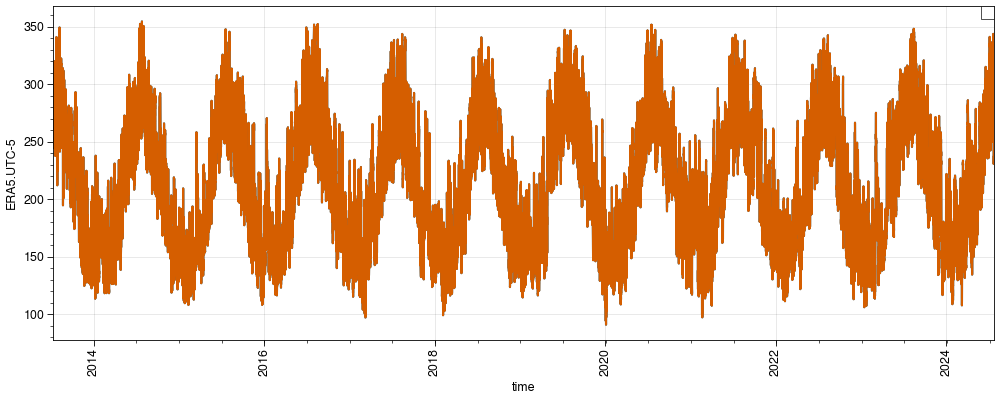

In [49]:
%matplotlib widget
fig, axs = pplt.subplots(figsize=(10,4))

# ds_interp_out_grid.plot(ax=axs[0])
ds_interp_out_grid_local.sel(time=ds_lwd['ERA5.UTC-5'].time).plot(ax=axs[0])
ds_lwd['ERA5.UTC-5'].plot(ax=axs[0])
axs.legend()

In [64]:
ds_lwd['LWD'] = ds_lwd['LWD'].astype('float64')

In [53]:
ds_lwd['ERA5.UTC-5'].dtype

dtype('float64')

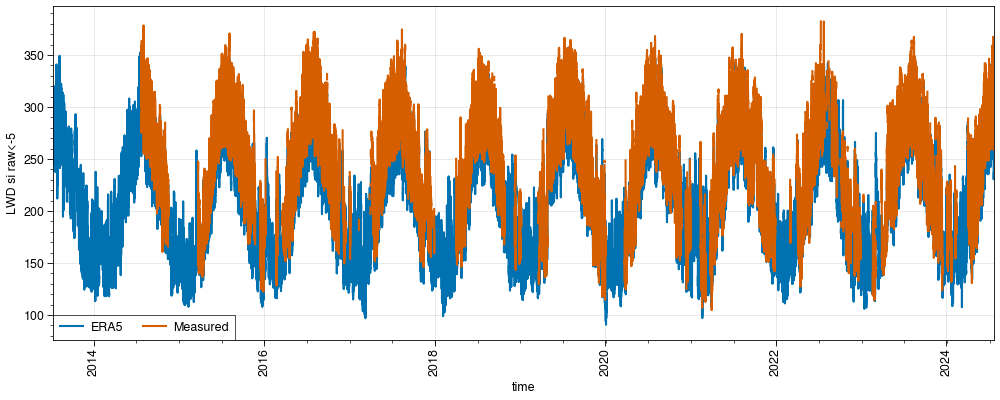

In [66]:
%matplotlib widget
fig, axs = pplt.subplots(figsize=(10,4))

ds_lwd['ERA5.UTC-5'].plot(ax=axs[0], label='ERA5')
ds_lwd['LWD si raw<-5'].plot(ax=axs[0], label='Measured')
axs.legend()

In [84]:
def LWD_pred0_func(LWD_ERA5, a, b):
    return LWD_ERA5 * a + b 

def LWD_pred_func(LWD_ERA5, T_ERA5, a, b, c):
    return LWD_ERA5 * a + T_ERA5 * b + c

def mse(x, y):
    return ((x - y)**2).mean().values.item(0)

In [70]:
import scipy.optimize as optimize

def f(params):
    # print(params)  # <-- you'll see that params is a NumPy array
    a, b= params # <-- for readability you may wish to assign names to the component variables
    metric = mse(
        ds_lwd['LWD si raw<-5'],
        a*ds_lwd['ERA5.UTC-5'] + b
    )
    return metric

initial_guess = [1, 1]
result = optimize.minimize(f, initial_guess)
if result.success:
    fitted_params = result.x
    print('RMSE = {:0.3f}'.format(np.sqrt(result.fun)))
    print(fitted_params)
else:
    raise ValueError(result.message)

RMSE = 24.278
[ 0.98036188 22.47429435]


In [89]:
LWD_pred0 = LWD_pred0_func(ds_lwd['ERA5.UTC-5'], 0.98036188, 22.47429435)
LWD_pred0

<xarray.DataArray 'ERA5.UTC-5' (time: 96697)> Size: 774kB
array([315.18318752, 312.33278536, 303.78605516, ..., 266.6407052 ,
       262.45539396, 254.54671596])
Coordinates:
  * time     (time) datetime64[ns] 774kB 2013-07-11T09:00:00 ... 2024-07-22T0...

In [61]:
import scipy.optimize as optimize

def f(params):
    # print(params)  # <-- you'll see that params is a NumPy array
    a, b, c = params # <-- for readability you may wish to assign names to the component variables
    metric = mse(
        ds_lwd['LWD si raw<-5'],
        a*ds_lwd['ERA5.UTC-5'] + b*ds_lwd['Air Temp. °C'] + c
    )
    return metric

initial_guess = [1, 1, 1]
result = optimize.minimize(f, initial_guess)
if result.success:
    fitted_params = result.x
    print('RMSE = {:0.3f}'.format(np.sqrt(result.fun)))
    print(fitted_params)
else:
    raise ValueError(result.message)

RMSE = 22.890
[ 0.7323247   1.15907148 86.41242198]


In [87]:
LWD_pred = LWD_pred_func(ds_lwd['ERA5.UTC-5'], ds_lwd['Air Temp. °C'], 0.7323247, 1.15907148, 86.41242198)
LWD_pred

<xarray.DataArray (time: 96697)> Size: 774kB
array([312.9690995 , 310.99945897, 306.89571811, ..., 275.34741638,
       271.98518821, 266.8999746 ])
Coordinates:
  * time     (time) datetime64[ns] 774kB 2013-07-11T09:00:00 ... 2024-07-22T0...

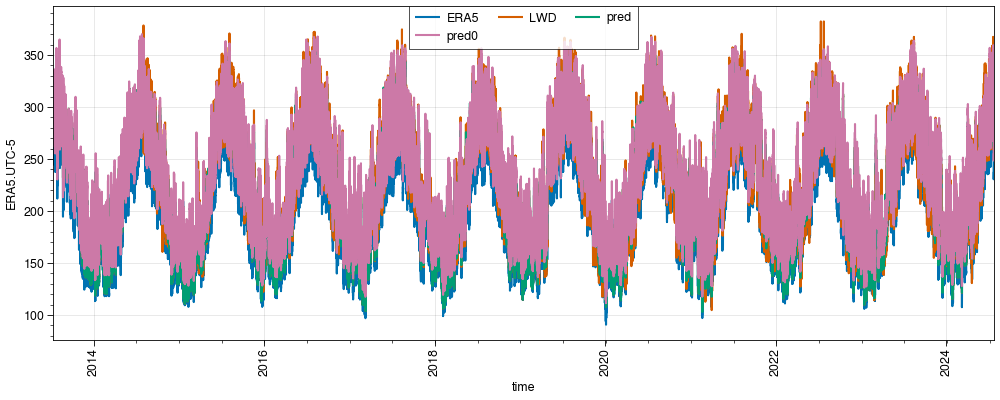

In [76]:
%matplotlib widget
fig, axs = pplt.subplots(figsize=(10,4))

ds_lwd['ERA5.UTC-5'].plot(ax=axs[0], label='ERA5')
ds_lwd['LWD'].plot(ax=axs[0], label='LWD')
LWD_pred.plot(ax=axs[0], label='pred')
LWD_pred0.plot(ax=axs[0], label='pred0')
axs.legend()

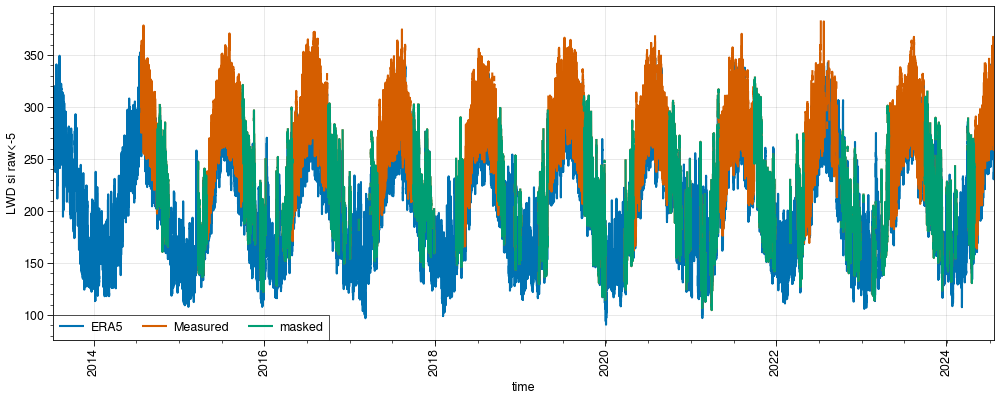

In [78]:
%matplotlib widget
fig, axs = pplt.subplots(figsize=(10,4))

ds_lwd['ERA5.UTC-5'].plot(ax=axs[0], label='ERA5')
ds_lwd['LWD si raw<-5'].plot(ax=axs[0], label='Measured')
ds_lwd['LWD si raw<-5'].where(ds_lwd.time.dt.month.isin([10, 11, 12, 1, 2, 3, 4])).plot(ax=axs[0], label='masked')
axs.legend()

In [ ]:
.where(ds.DATE.dt.month.isin([10, 11, 12, 1, 2, 3, 4]))

In [79]:
import scipy.optimize as optimize

def f(params):
    # print(params)  # <-- you'll see that params is a NumPy array
    a, b= params # <-- for readability you may wish to assign names to the component variables
    metric = mse(
        ds_lwd['LWD si raw<-5'].where(ds_lwd.time.dt.month.isin([10, 11, 12, 1, 2, 3, 4])),
        a*ds_lwd['ERA5.UTC-5'].where(ds_lwd.time.dt.month.isin([10, 11, 12, 1, 2, 3, 4])) + b
    )
    return metric

initial_guess = [1, 1]
result = optimize.minimize(f, initial_guess)
if result.success:
    fitted_params = result.x
    print('RMSE = {:0.3f}'.format(np.sqrt(result.fun)))
    print(fitted_params)
else:
    raise ValueError(result.message)

RMSE = 23.803
[ 0.89930619 33.10629484]


In [72]:
LWD_pred0 = LWD_pred0_func(ds_lwd['ERA5.UTC-5'], 0.98036188, 22.47429435)
LWD_pred0

<xarray.DataArray 'ERA5.UTC-5' (time: 96697)> Size: 774kB
array([315.18318752, 312.33278536, 303.78605516, ..., 266.6407052 ,
       262.45539396, 254.54671596])
Coordinates:
  * time     (time) datetime64[ns] 774kB 2013-07-11T09:00:00 ... 2024-07-22T0...

In [80]:
import scipy.optimize as optimize

def f(params):
    # print(params)  # <-- you'll see that params is a NumPy array
    a, b, c = params # <-- for readability you may wish to assign names to the component variables
    metric = mse(
        ds_lwd['LWD si raw<-5'].where(ds_lwd.time.dt.month.isin([10, 11, 12, 1, 2, 3, 4])),
        a*ds_lwd['ERA5.UTC-5'].where(ds_lwd.time.dt.month.isin([10, 11, 12, 1, 2, 3, 4])) + b*ds_lwd['Air Temp. °C'].where(ds_lwd.time.dt.month.isin([10, 11, 12, 1, 2, 3, 4])) + c
    )
    return metric

initial_guess = [1, 1, 1]
result = optimize.minimize(f, initial_guess)
if result.success:
    fitted_params = result.x
    print('RMSE = {:0.3f}'.format(np.sqrt(result.fun)))
    print(fitted_params)
else:
    raise ValueError(result.message)

RMSE = 22.285
[  0.61567889   1.44510928 113.31172143]


In [85]:
LWD_pred2 = LWD_pred_func(ds_lwd['ERA5.UTC-5'], ds_lwd['Air Temp. °C'], 0.61567889, 1.44510928, 113.31172143)
LWD_pred2

<xarray.DataArray (time: 96697)> Size: 774kB
array([306.99195664, 305.40084859, 302.87683322, ..., 274.8101718 ,
       271.88772476, 267.94648851])
Coordinates:
  * time     (time) datetime64[ns] 774kB 2013-07-11T09:00:00 ... 2024-07-22T0...

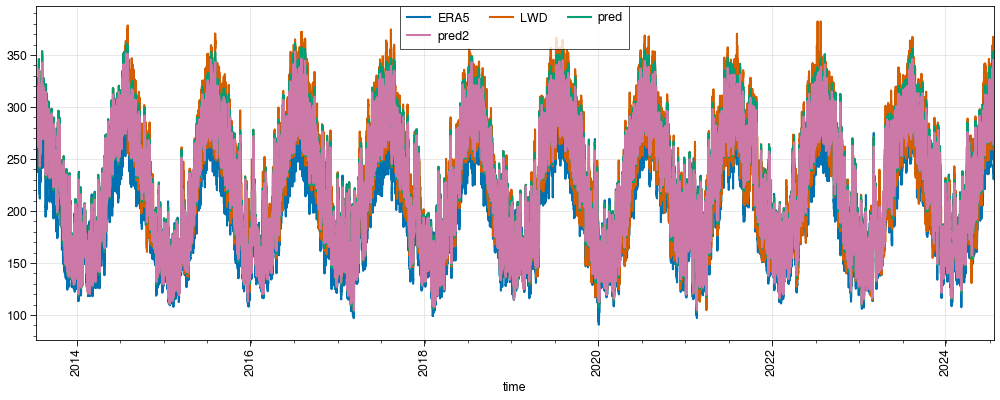

In [94]:
%matplotlib widget
fig, axs = pplt.subplots(figsize=(10,4))

ds_lwd['ERA5.UTC-5'].plot(ax=axs[0], label='ERA5')
ds_lwd['LWD'].plot(ax=axs[0], label='LWD')
LWD_pred.plot(ax=axs[0], label='pred')
# LWD_pred0.plot(ax=axs[0], label='pred0')
LWD_pred2.plot(ax=axs[0], label='pred2')
axs.legend()

## Check 

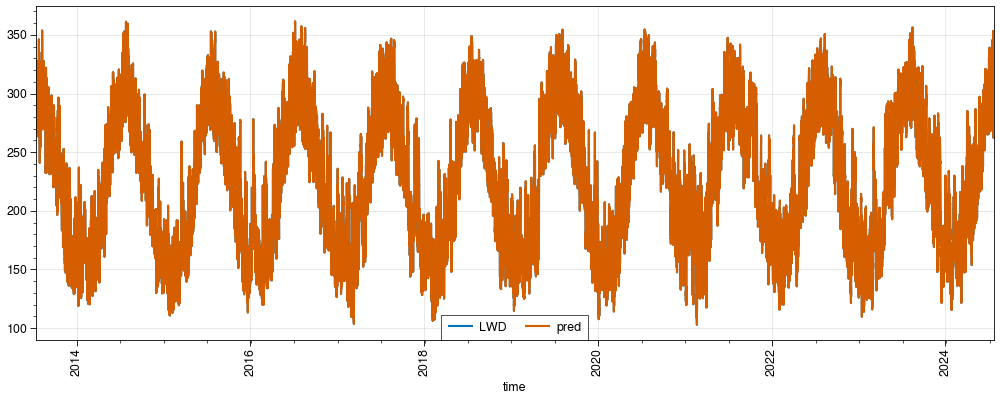

In [97]:
%matplotlib widget
fig, axs = pplt.subplots(figsize=(10,4))

# ds_lwd['ERA5.UTC-5'].plot(ax=axs[0], label='ERA5')
# ds_lwd['LWD'].plot(ax=axs[0], label='LWD')
ds_lwd['Corr'].plot(ax=axs[0], label='LWD')
LWD_pred.plot(ax=axs[0], label='pred')
# LWD_pred0.plot(ax=axs[0], label='pred0')
# LWD_pred2.plot(ax=axs[0], label='pred2')
axs.legend()

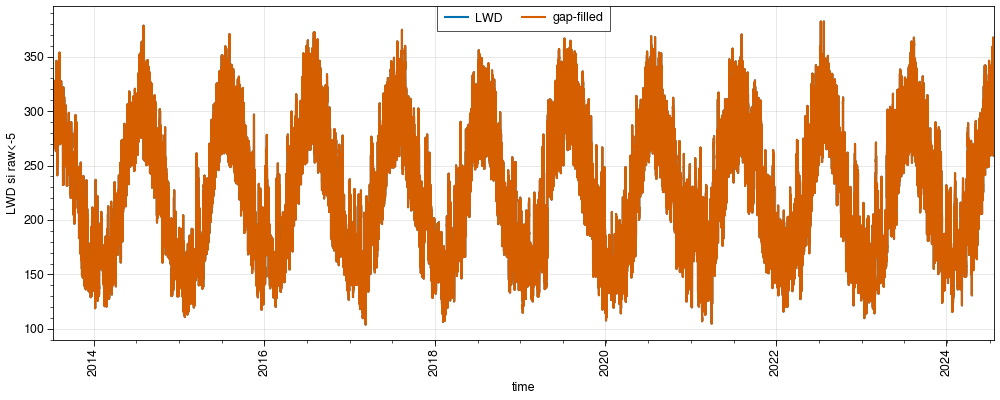

In [98]:
%matplotlib widget
fig, axs = pplt.subplots(figsize=(10,4))

# ds_lwd['ERA5.UTC-5'].plot(ax=axs[0], label='ERA5')
ds_lwd['LWD'].plot(ax=axs[0], label='LWD')
ds_lwd['LWD si raw<-5'].fillna(LWD_pred).plot(ax=axs[0], label='gap-filled')
# ds_lwd['Corr'].plot(ax=axs[0], label='LWD')
# LWD_pred.plot(ax=axs[0], label='pred')
# LWD_pred0.plot(ax=axs[0], label='pred0')
# LWD_pred2.plot(ax=axs[0], label='pred2')
axs.legend()

## Try alternative gapfilling

### Add RH

In [105]:
df_RH = pd.read_excel(path+'/DataML.xlsx', parse_dates=['time, UTC'])
df_RH.set_index('time, UTC', inplace=True)
df_RH

,"ERA 5 pressure, kPa",Air Temp. °C,RH values,"Specific humidity, g kg-1"
"time, UTC",,,,
2013-07-11 14:00:00,100.667453,6.819954,90.539907,5.559297
2013-07-11 15:00:00,100.639789,6.957644,88.377942,5.479365
2013-07-11 16:00:00,100.666109,8.925269,89.255245,6.329087
2013-07-11 17:00:00,100.663687,10.422386,88.422344,6.936189
2013-07-11 18:00:00,100.665562,8.218802,87.315260,5.900548
...,...,...,...,...
2025-03-23 10:00:00,101.304578,NaN,NaN,NaN
2025-03-23 11:00:00,101.356172,NaN,NaN,NaN
2025-03-23 12:00:00,101.381453,NaN,NaN,NaN


In [106]:
ds_RH = df_RH.to_xarray()
ds_RH = ds_RH.rename({'time, UTC': 'time'})
ds_RH

<xarray.Dataset> Size: 4MB
Dimensions:                     (time: 102553)
Coordinates:
  * time                        (time) datetime64[ns] 820kB 2013-07-11T14:00:...
Data variables:
    ERA 5 pressure, kPa         (time) float64 820kB 100.7 100.6 ... 101.4 101.4
    Air Temp. °C                (time) float64 820kB 6.82 6.958 ... nan nan
    RH values                   (time) float64 820kB 90.54 88.38 ... nan nan
    Specific humidity,  g kg-1  (time) float64 820kB 5.559 5.479 ... nan nan

In [110]:
ds_RH_local = ds_RH.copy()
ds_RH_local['time'] = ds_RH_local['time'] - pd.Timedelta(hours=5)
ds_RH_local = ds_RH_local.sel(time=ds_lwd.time)
ds_RH_local

<xarray.Dataset> Size: 4MB
Dimensions:                     (time: 96697)
Coordinates:
  * time                        (time) datetime64[ns] 774kB 2013-07-11T09:00:...
Data variables:
    ERA 5 pressure, kPa         (time) float64 774kB 100.7 100.6 ... 101.3 101.3
    Air Temp. °C                (time) float64 774kB 6.82 6.958 ... 5.443 6.152
    RH values                   (time) float64 774kB 90.54 88.38 ... 73.99 72.22
    Specific humidity,  g kg-1  (time) float64 774kB 5.559 5.479 ... 4.101 4.206

In [115]:
import scipy.optimize as optimize

def LWD_pred_RH_func(LWD_ERA5, T_ERA5, SH_ERA5, a, b, c, d):
    return LWD_ERA5 * a + T_ERA5 * b + SH_ERA5 * c + d

def f(params):
    # print(params)  # <-- you'll see that params is a NumPy array
    a, b, c, d = params # <-- for readability you may wish to assign names to the component variables
    metric = mse(
        ds_lwd['LWD si raw<-5'],
        a*ds_lwd['ERA5.UTC-5'] + b*ds_lwd['Air Temp. °C'] + c*ds_RH_local['Specific humidity,  g kg-1'] + d
    )
    return metric

initial_guess = [1, 1, 1, 1]
result = optimize.minimize(f, initial_guess)
if result.success:
    fitted_params = result.x
    print('RMSE = {:0.3f}'.format(np.sqrt(result.fun)))
    print(fitted_params)
else:
    raise ValueError(result.message)

RMSE = 22.679
[ 0.68566221  0.7545348   4.24996391 84.04889863]


In [116]:
LWD_pred_RH = LWD_pred_RH_func(ds_lwd['ERA5.UTC-5'], ds_lwd['Air Temp. °C'], ds_RH_local['Specific humidity,  g kg-1'], 0.68566221,  0.7545348,   4.24996391, 84.04889863)
LWD_pred_RH

<xarray.DataArray (time: 96697)> Size: 774kB
array([317.54134192, 315.31195969, 314.43033272, ..., 276.3326655 ,
       273.42809239, 268.87676984])
Coordinates:
  * time     (time) datetime64[ns] 774kB 2013-07-11T09:00:00 ... 2024-07-22T0...

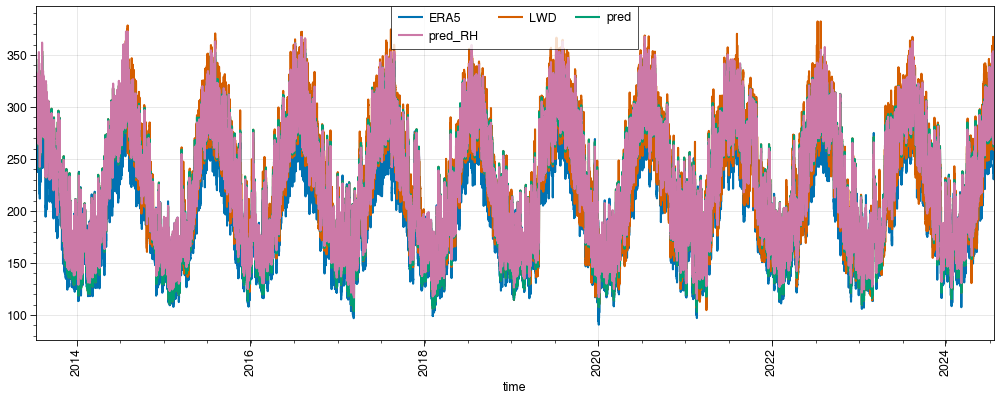

In [117]:
%matplotlib widget
fig, axs = pplt.subplots(figsize=(10,4))

ds_lwd['ERA5.UTC-5'].plot(ax=axs[0], label='ERA5')
ds_lwd['LWD'].plot(ax=axs[0], label='LWD')
LWD_pred.plot(ax=axs[0], label='pred')
# LWD_pred0.plot(ax=axs[0], label='pred0')
LWD_pred_RH.plot(ax=axs[0], label='pred_RH')
axs.legend()

### Steph Bolt

In [118]:
SB = 5.670374419e-8

In [138]:
import scipy.optimize as optimize

def LWD_pred_SB_func(T_ERA5, a, b):
    return a * SB * (T_ERA5+273.15)**4 + b

def f(params):
    # print(params)  # <-- you'll see that params is a NumPy array
    a, b = params # <-- for readability you may wish to assign names to the component variables
    metric = mse(
        ds_lwd['LWD si raw<-5'],
        a * SB * (ds_lwd['Air Temp. °C']+273.15)**4 + b
    )
    return metric

initial_guess = [1, 1]
result = optimize.minimize(f, initial_guess)
if result.success:
    fitted_params = result.x
    print('RMSE = {:0.3f}'.format(np.sqrt(result.fun)))
    print(fitted_params)
else:
    raise ValueError(result.message)

RMSE = 30.527
[ 0.84902159 -0.44921211]


In [139]:
LWD_pred_SB = LWD_pred_SB_func( ds_lwd['Air Temp. °C'], 0.84902159, -0.44921211)
LWD_pred_SB

<xarray.DataArray 'Air Temp. °C' (time: 96697)> Size: 774kB
array([295.3358052 , 295.91810975, 304.3336299 , ..., 290.40573593,
       289.55762326, 292.52379227])
Coordinates:
  * time     (time) datetime64[ns] 774kB 2013-07-11T09:00:00 ... 2024-07-22T0...

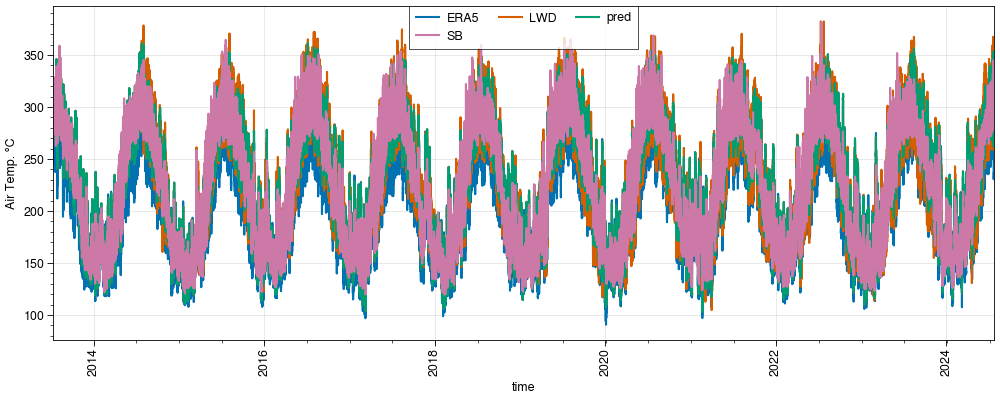

In [140]:
%matplotlib widget
fig, axs = pplt.subplots(figsize=(10,4))

ds_lwd['ERA5.UTC-5'].plot(ax=axs[0], label='ERA5')
ds_lwd['LWD'].plot(ax=axs[0], label='LWD')
LWD_pred.plot(ax=axs[0], label='pred')
# LWD_pred0.plot(ax=axs[0], label='pred0')
LWD_pred_SB.plot(ax=axs[0], label='SB')

axs.legend()